In [6]:
#테이터 셋 생성을 위한 패키지
from sklearn.model_selection import train_test_split


# 의사결정 트리 알고리즘 서브 패키지
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

import tensorflow as tf
import pandas as pd
import numpy


C:\Users\hiranMain\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\hiranMain\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\hiranMain\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\hiranMain\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: Futu

In [7]:
#features =14
#filename="./dataset/20200614_v1.csv"
#filename="./dataset/20200717_v1.csv"

# seed 값 설정
seed = 0
numpy.random.seed(seed)
tf.set_random_seed(seed)

filename="./dataset/20201103_v1.csv"
# 데이터 읽어 들이기--- (※1)
#df_pre = pd.read_csv("./dataset/data2018_2_notitle.csv", header=None)
df_pre = pd.read_csv(filename, header=0)
features = len(df_pre.columns)-1

In [32]:
# 데이터 내부의 기호를 숫자로 변환하기--- (※2)
df = df_pre.sample(frac=1)
dataset = df.values
X = dataset[:,0:features]
Y = dataset[:,features]

print('Before OverSampling, the shape of train_X: {}'.format(X.shape))
print('Before OverSampling, the shape of train_y: {} \n'.format(X.shape))

print("Before OverSampling, counts of label '1': {}".format(sum(Y==1)))
print("Before OverSampling, counts of label '0': {}".format(sum(Y==0)))




Before OverSampling, the shape of train_X: (98685, 22)
Before OverSampling, the shape of train_y: (98685, 22) 

Before OverSampling, counts of label '1': 15891
Before OverSampling, counts of label '0': 82794


In [33]:
from imblearn.over_sampling import SMOTE


oversample = SMOTE()
X, Y = oversample.fit_resample(X, Y)

print('After OverSampling, the shape of train_X: {}'.format(X.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(X.shape))

print("After OverSampling, counts of label '1': {}".format(sum(Y==1)))
print("After OverSampling, counts of label '0': {}".format(sum(Y==0)))


After OverSampling, the shape of train_X: (165588, 22)
After OverSampling, the shape of train_y: (165588, 22) 

After OverSampling, counts of label '1': 82794
After OverSampling, counts of label '0': 82794


In [34]:
# 학습 전용과 테스트 전용 데이터로 나누기 --- (※3)
#테스트, 검증데이터 분학 7:3 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=seed)
X_train, X_test = X_train / 255., X_test / 255.

In [35]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, Y_train)

DecisionTreeClassifier()

In [36]:
Y_prediction = dt_model.predict(X_test) #test data set으로 검증

f_measure = metrics.classification_report(Y_test, Y_prediction)
accuracy = metrics.accuracy_score(Y_test, Y_prediction)

print('Accuracy of DecisionTree Model: %.2f' % accuracy)
print("\r\n",  f_measure)

Accuracy of DecisionTree Model: 0.86

               precision    recall  f1-score   support

           0       0.88      0.82      0.85     24616
           1       0.83      0.89      0.86     25061

    accuracy                           0.86     49677
   macro avg       0.86      0.86      0.86     49677
weighted avg       0.86      0.86      0.86     49677



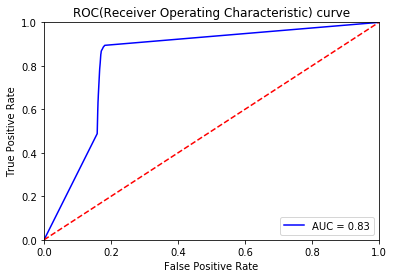

In [37]:
# calculate the fpr and tpr for all thresholds of the classification
probs = dt_model.predict_proba(X_test)

preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(Y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('ROC(Receiver Operating Characteristic) curve')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


